# Extract wildlife observation data with SensingClues

[SensingClues](https://sensingclues.org/) allows you to record, monitor and analyze wildlife observations to support nature conservation initiatives. This notebook shows the following:

- **Basic**: the main SensingClues-functionality of **extracting observation and track data**. 
- **Advanced**: this section includes the usage of a hierarchy of available concepts (e.g. animal species or type of activity), which enhances reporting and analysis of the observation data. Further, we show how to collect and visualize layer data from SensingClues.

You can adapt this notebook to extract your own recordings. For more detail on what you can configure as a user, see the API-documentation of the `sensingclues`-package.

### Before you start

To run this notebook, you should:
- create a personal account at SensingClues using the Cluey Data Collector app, which can be downloaded from the Google Playstore (not supported for iOS currently). Also see [here](https://sensingclues.org/portal).
- install the `sensingclues`-package in a virtual python environment (`pip install -e .` from the main directory of the repository).
- install the requirements in requirements.txt (if not already installed automatically in the previous step).
- create a file '.env' in the root of the wildcat-api-python-repository, containing your SensingClues credentials. These will be read in this notebook to log in. The file should look like this:
```
# SensingClues credentials
USERNAME=your_username
PASSWORD=your_password
```

## Configuration

In [1]:
import os

In [2]:
from dotenv import load_dotenv

In [3]:
from sensingclues import sclogging
from sensingclues.api_calls import SensingClues
from sensingclues.src import helper_functions as helpers

In [4]:
logger = sclogging.get_sc_logger()
sclogging.set_sc_log_level("DEBUG")

In [5]:
load_dotenv()

True

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
# N.B. you can place your credentials here as well, but this is not recommended.
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

## Connect to SensingClues

In [8]:
sensing_clues = SensingClues(username, password)

2024-05-29 10:24:17 [api_calls.py:54] INFO - Successfully logged in to SensingClues.


In [9]:
# you should have logged in automatically by calling the class.
# if not, you can call the login-method separately.
# status = sensing_clues.login(username, password)

In [10]:
# It is not necessary to log out, but you can do so by calling:
# sensing_clues.logout()

## Check available data

By default, you have access to several groups of data, such as a demo dataset and a large dataset offered by [Global Forest Watch](https://www.globalforestwatch.org).

In [11]:
info = sensing_clues.get_groups()
info

,name,description,n_records
0,focus-project-2435800,3june2020,405
1,focus-project-7136973,Cluey Data Collector,688
2,focus-project-7811010,Creekish mountains,157
3,focus-project-1234,Demo Upload,1848
4,focus-project-GFW,GFW,49468


In [12]:
# specify the group(s) to extract data from
groups = [
    "focus-project-1234",
]

## Basic functionality

- Get observation data
- Get track data

### Get observations

You can filter the extracted observations in multiple ways, such as data, coordinates (bounding box) and concepts. For full detail on the options, see the documentation of the API. Some key features are shown here:

- **Date and time**: set `date_from` and/or `date_until` (in format %Y-%m-%d, assumes UTC).
- **Coordinates**: set `coord`, e.g. {"north": 32, "east": 20, "south": 31, "west": 17}.
- **Concepts**: set `concepts` to include, e.g. 'animal'. *See example shown later in this notebook*.

#### Notes
- Each observation has a unique `entityId` and may have multiple concepts (labels) associated with it,
 in which case the number of records in the observations-dataframe is larger than
 the number of observations mentioned by the logger.
- Reading all data in a group can take minutes or longer, depending on the size of the dataset. If you want to do a quick test, you can limit the number of pages to read by setting `page_nbr_sample`. 

In [13]:
# a quick test can be done like so
obs_sample = sensing_clues.get_observations(groups=groups, page_nbr_sample=2)

2024-05-29 10:24:18 [api_calls.py:458] INFO - Scope '['focus-project-1234']' contains 1848 entities for data type 'observations'.
2024-05-29 10:24:18 [api_calls.py:465] INFO - Restricting number of pages to a sample of 2.
2024-05-29 10:24:18 [api_calls.py:478] INFO - Started reading available records.
2024-05-29 10:24:18 [api_calls.py:481] INFO - Reading page   0 out of 2 pages.
2024-05-29 10:24:19 [api_calls.py:493] INFO - Finished reading available records.


In [14]:
# see the API-documentation for a full description of filter possibilities
# to filter on concepts, see example shown later in this notebook.
observations = sensing_clues.get_observations(
    groups=groups,
    date_until="2018-07-01",
    coord={"north": 32, "east": 20, "south": 31.5, "west": 10}
)

2024-05-29 10:24:20 [api_calls.py:458] INFO - Scope '['focus-project-1234']' contains 159 entities for data type 'observations'.
2024-05-29 10:24:20 [api_calls.py:478] INFO - Started reading available records.
2024-05-29 10:24:20 [api_calls.py:481] INFO - Reading page   0 out of 16 pages.
2024-05-29 10:24:20 [api_calls.py:481] INFO - Reading page   2 out of 16 pages.
2024-05-29 10:24:21 [api_calls.py:481] INFO - Reading page   4 out of 16 pages.
2024-05-29 10:24:22 [api_calls.py:481] INFO - Reading page   6 out of 16 pages.
2024-05-29 10:24:23 [api_calls.py:481] INFO - Reading page   8 out of 16 pages.
2024-05-29 10:24:24 [api_calls.py:481] INFO - Reading page  10 out of 16 pages.
2024-05-29 10:24:24 [api_calls.py:481] INFO - Reading page  12 out of 16 pages.
2024-05-29 10:24:26 [api_calls.py:481] INFO - Reading page  14 out of 16 pages.
2024-05-29 10:24:26 [api_calls.py:493] INFO - Finished reading available records.


In [15]:
observations.head()

,entityId,entityType,entityName,projectId,projectName,observationType,when,where,agentName,conceptLabel,conceptId
0,O1234-8298573771345653336-2095,human activity,Observation,1234,Demo Upload,human activity,2018-06-17T00:00:00+02:00,"{'type': 'Point', 'coordinates': [19.46837283,...",,Logs,https://sensingclues.poolparty.biz/SCCSSOntolo...
1,O1234-8298573771345653336-2095,human activity,Observation,1234,Demo Upload,human activity,2018-06-17T00:00:00+02:00,"{'type': 'Point', 'coordinates': [19.46837283,...",,Burned,https://sensingclues.poolparty.biz/SCCSSOntolo...
2,O1234-8298573771345653336-2087,human activity,Observation,1234,Demo Upload,human activity,2018-06-10T00:00:00+02:00,"{'type': 'Point', 'coordinates': [16.37800461,...",,Kiln,https://sensingclues.poolparty.biz/SCCSSOntolo...
3,O1234-8298573771345653336-2087,human activity,Observation,1234,Demo Upload,human activity,2018-06-10T00:00:00+02:00,"{'type': 'Point', 'coordinates': [16.37800461,...",,Burned,https://sensingclues.poolparty.biz/SCCSSOntolo...
4,O1234-8298573771345653336-2082,human activity,Observation,1234,Demo Upload,human activity,2018-06-05T00:00:00+02:00,"{'type': 'Point', 'coordinates': [17.05109027,...",,Kiln,https://sensingclues.poolparty.biz/SCCSSOntolo...


### Get tracks

You can filter the extracted observations in multiple ways, such as data, coordinates (bounding box) and concepts, similar to `get_observations`. 

In [16]:
tracks = sensing_clues.get_tracks(
    groups=groups,
    date_until="2018-07-01",
    coord={"north": 32, "east": 20, "south": 31.5, "west": 10}
)

2024-05-29 10:24:27 [api_calls.py:458] INFO - Scope '['focus-project-1234']' contains 0 entities for data type 'tracks'.
2024-05-29 10:24:27 [api_calls.py:495] WARNING - No data available for 'tracks', returning empty dataframe.


In [17]:
tracks.head()

""


#### Add geosjon-data to tracks

If available, you can add geojson-data (including geometries) to the tracks.

In [18]:
tracks_geo = sensing_clues.add_geojson_to_tracks(tracks)

2024-05-29 10:24:27 [api_calls.py:189] WARNING - No tracks available, cannot obtain geojson-data.


## Advanced functionality

### Get all available concepts and their hierarchy

SensingClues offers hierarchies containing the available concepts (e.g. animals). As shown later in this notebook, you can use this information to subsequently query:
- the details for a specific concept
- check the occurrence of each concept in the group(s) of observations you have access to.

In [19]:
hierarchy = sensing_clues.get_hierarchy(scope="SCCSS")
hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 0 to 1537
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1209 non-null   object
 1   parent        1209 non-null   object
 2   label         1209 non-null   object
 3   altLabels     753 non-null    object
 4   children      155 non-null    object
 5   isTopConcept  1209 non-null   bool  
dtypes: bool(1), object(5)
memory usage: 57.9+ KB


### Get details for specific concepts in the hierarchy

You can get information on children or the parents of a concept in the hierarchy by filtering on its label or id. Use the available helper functions to do so. For example, you could do the following for the concept of a "Kite" (oid = "https://sensingclues.poolparty.biz/SCCSSOntology/222"):

```
oid = "https://sensingclues.poolparty.biz/SCCSSOntology/222"
helpers.get_children_for_id(hierarchy, oid)
helpers.get_parent_for_id(hierarchy, oid)
helpers.get_label_for_id(hierarchy, oid)
```

or, if filtering on the label itself:

```
label = 'Kite'
helpers.get_children_for_label(hierarchy, label)
helpers.get_parent_for_label(hierarchy, label)
helpers.get_id_for_label(hierarchy, label)
```

N.B. Alternatively, you could directly filter the `hierarchy`-dataframe yourself of course.

#### Tell me, what animal belongs to this concept id?

In [20]:
oid = "https://sensingclues.poolparty.biz/SCCSSOntology/222"
helpers.get_label_for_id(hierarchy, oid)

'Kite'

#### Does this Kite have any children?

In [21]:
label = "Kite"
children_label = helpers.get_children_for_label(hierarchy, label)
children_label

['https://sensingclues.poolparty.biz/SCCSSOntology/224',
 'https://sensingclues.poolparty.biz/SCCSSOntology/223']

#### What are the details for these children?

In [22]:
hierarchy.loc[hierarchy["id"].isin(children_label)]

,id,parent,label,altLabels,children,isTopConcept
448,https://sensingclues.poolparty.biz/SCCSSOntolo...,https://sensingclues.poolparty.biz/SCCSSOntolo...,Kite black,"[Kite_black, Black kite, Milvus migrans, Kite_...",NaN,False
1108,https://sensingclues.poolparty.biz/SCCSSOntolo...,https://sensingclues.poolparty.biz/SCCSSOntolo...,Kite red,"[red_kite, Milvus milvus, Kite_red, red_kite, ...",NaN,False


### Filter observations on concept

Here we show an example of filtering the data on these concepts.

**Instructions:**
- Set `concepts` to include, e.g. 'animal', specified as a Pool Party URL, e.g. "https://sensingclues.poolparty.biz/SCCSSOntology/186".
- Note that you can infer the URL's available for a certain common name by using the helper function `helpers.get_label_for_id(hierarchy, oid)`, as shown above.
- Further, if you want to exclude subconcepts, i.e. keep observations with the label 'animal' but exclude observations with the label 'elephant', set `include_subconcepts=False`.


In [23]:
concept_animal = [
    "https://sensingclues.poolparty.biz/SCCSSOntology/308", # Impala
    "https://sensingclues.poolparty.biz/SCCSSOntology/319", # Giraffe    
    
    # or infer the id using a label, for instance:
    # helpers.get_id_for_label(hierarchy, "Animal sighting"),
]
observations = sensing_clues.get_observations(
    groups=groups,
    date_until="2018-07-01",
    concepts=concept_animal,
    coord={"north": 32, "east": 20, "south": 31.5, "west": 10}
)

2024-05-29 10:24:28 [api_calls.py:458] INFO - Scope '['focus-project-1234']' contains 5 entities for data type 'observations'.
2024-05-29 10:24:28 [api_calls.py:478] INFO - Started reading available records.
2024-05-29 10:24:28 [api_calls.py:481] INFO - Reading page   0 out of 1 pages.
2024-05-29 10:24:28 [api_calls.py:493] INFO - Finished reading available records.


In [24]:
observations.head()

,entityId,entityType,entityName,projectId,projectName,observationType,when,where,agentName,conceptLabel,conceptId
0,O1234-8298573771345653336-1609,human activity,Observation,1234,Demo Upload,human activity,2017-02-10T00:00:00+01:00,"{'type': 'Point', 'coordinates': [18.39919963,...",,Carcass,https://sensingclues.poolparty.biz/SCCSSOntolo...
1,O1234-8298573771345653336-1609,human activity,Observation,1234,Demo Upload,human activity,2017-02-10T00:00:00+01:00,"{'type': 'Point', 'coordinates': [18.39919963,...",,Giraffe,https://sensingclues.poolparty.biz/SCCSSOntolo...
2,O1234-8298573771345653336-1609,human activity,Observation,1234,Demo Upload,human activity,2017-02-10T00:00:00+01:00,"{'type': 'Point', 'coordinates': [18.39919963,...",,Recorded,https://sensingclues.poolparty.biz/SCCSSOntolo...
3,O1234-8298573771345653336-1541,human activity,Observation,1234,Demo Upload,human activity,2016-10-02T00:00:00+02:00,"{'type': 'Point', 'coordinates': [15.83503126,...",,Impala,https://sensingclues.poolparty.biz/SCCSSOntolo...
4,O1234-8298573771345653336-1541,human activity,Observation,1234,Demo Upload,human activity,2016-10-02T00:00:00+02:00,"{'type': 'Point', 'coordinates': [15.83503126,...",,Logs,https://sensingclues.poolparty.biz/SCCSSOntolo...


### Count concepts related to observations

Get the number of observations per concept in the ontology (hierarchy).

You can filter on for instance:
- `date_from` and `date_until`.
- A list of child concepts, e.g. by extracting children for the label "Animal sighting" from hierarchy (see example below).

In [25]:
date_from = "2010-01-01"
date_until = "2024-01-01"
label = "Animal sighting"
children_label = helpers.get_children_for_label(hierarchy, label)
concept_counts = sensing_clues.get_concept_counts(
    groups, date_from=date_from, date_until=date_until, concepts=children_label
)
concept_counts.head()

,frequency,_value
0,98,https://sensingclues.poolparty.biz/SCCSSOntolo...
1,97,https://sensingclues.poolparty.biz/SCCSSOntolo...
2,1,https://sensingclues.poolparty.biz/SCCSSOntolo...
3,1,https://sensingclues.poolparty.biz/SCCSSOntolo...
4,12,https://sensingclues.poolparty.biz/SCCSSOntolo...


#### Example: visualize concept counts

To make the visualization intelligible, you can add information on labels from the `hierarchy`-dataframe.

To do so, first install matplotlib.

In [26]:
# !pip install matplotlib

In [27]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

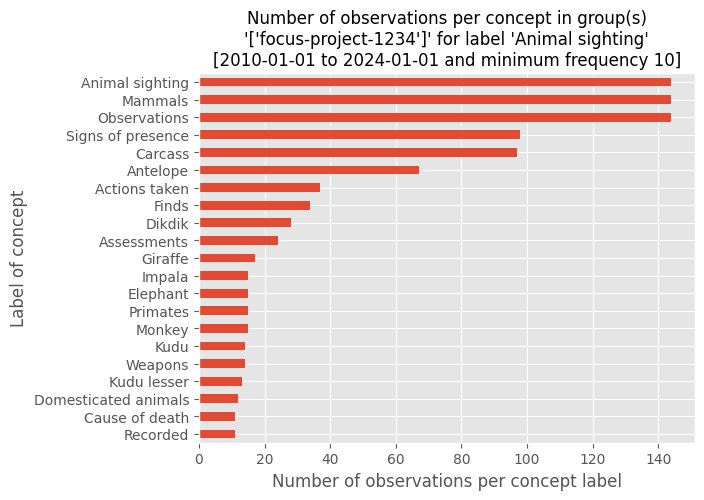

In [28]:
min_freq = 10
if not concept_counts.empty:
    concept_freq = concept_counts.merge(
        hierarchy, left_on="_value", right_on="id", how="left"
    )
    concept_freq["label"] = concept_freq["label"].fillna(concept_freq["_value"])
    concept_freq = concept_freq.set_index("label")["frequency"].sort_values(
        ascending=True
    )

    concept_freq.loc[concept_freq >= min_freq].plot(kind="barh")
    plt.title(
        f"Number of observations per concept in group(s)\n'{groups}' for label '{label}'\n"
        f"[{date_from} to {date_until} and minimum frequency {min_freq}]",
        fontsize=12,
    )
    plt.xlabel("Number of observations per concept label")
    plt.ylabel("Label of concept")

### Get layers

In [29]:
# check all available layers
layers = sensing_clues.get_all_layers()
layers

,pid,lid,layerName,description,geometryType
0,1234,0,test_multipolygon,All MultiPolygon geometries for layer test_mul...,MultiPolygon
1,1234,1,test_polygon,All Polygon geometries for layer test_polygon,Polygon


### Get details for an individual layer

In [30]:
layer = sensing_clues.get_layer_features(layer_name="test_multipolygon")

In [31]:
layer.head()

,id,DocId,ShortId,OBJECTID,EntityId,NAME,geometry,_type,_id,geometry_type,geometry_coordinates,properties_DocId,properties_ShortId,properties_OBJECTID,properties_EntityId,properties_NAME
0,194355991,/GeoFeature/G1234-9853708381955736304-1.json,194355991,194355991,G1234-9853708381955736304-1,None,"MULTIPOLYGON (((4.87038 52.25303, 4.80171 52.2...",Feature,194355991,MultiPolygon,"[[[[4.87037658691406, 52.2530274427686], [4.80...",/GeoFeature/G1234-9853708381955736304-1.json,194355991,194355991,G1234-9853708381955736304-1,None
1,151201554,/GeoFeature/G1234-9853708381955736304-2.json,151201554,151201554,G1234-9853708381955736304-2,None,"MULTIPOLYGON (((5.06779 52.05713, 5.06710 52.0...",Feature,151201554,MultiPolygon,"[[[[5.06778717041016, 52.0571349329375], [5.06...",/GeoFeature/G1234-9853708381955736304-2.json,151201554,151201554,G1234-9853708381955736304-2,None
2,108047117,/GeoFeature/G1234-9853708381955736304-3.json,108047117,108047117,G1234-9853708381955736304-3,None,"MULTIPOLYGON (((5.87116 51.85381, 5.88181 51.8...",Feature,108047117,MultiPolygon,"[[[[5.87116241455078, 51.8538062484514], [5.88...",/GeoFeature/G1234-9853708381955736304-3.json,108047117,108047117,G1234-9853708381955736304-3,None


#### Plot available geometries

This requires installation of library to visualize geospatial data. Here, we use Folium.

In [32]:
# !pip install folium

In [33]:
import folium

In [34]:
poly_map = folium.Map([51.9244, 4.4777], zoom_start=8, tiles="cartodbpositron")
for _, geometry in layer["geometry"].items():
    folium.GeoJson(geometry).add_to(poly_map)
folium.LatLngPopup().add_to(poly_map)
poly_map